In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np


In [6]:
img= image.load_img('basedata/training/bilal/1.jpg')

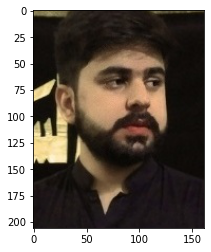

In [7]:
plt.imshow(img)

In [10]:
cv2.imread('basedata/training/bilal/1.jpg')

array([[[ 86, 131, 142],
        [ 83, 128, 139],
        [ 77, 122, 133],
        ...,
        [ 55,  78,  86],
        [ 64,  88,  94],
        [ 65,  89,  95]],

       [[ 86, 128, 140],
        [ 81, 123, 135],
        [ 81, 123, 135],
        ...,
        [ 49,  71,  77],
        [ 53,  72,  79],
        [ 52,  71,  78]],

       [[ 98, 139, 148],
        [ 87, 128, 137],
        [ 87, 128, 137],
        ...,
        [ 16,  32,  38],
        [ 21,  35,  41],
        [ 20,  34,  40]],

       ...,

       [[ 19,  20,  24],
        [ 18,  19,  23],
        [ 17,  18,  22],
        ...,
        [ 25,  21,  27],
        [ 24,  19,  28],
        [ 23,  18,  27]],

       [[ 18,  17,  21],
        [ 18,  17,  21],
        [ 19,  18,  22],
        ...,
        [ 27,  23,  29],
        [ 25,  20,  29],
        [ 24,  19,  28]],

       [[ 17,  16,  20],
        [ 18,  17,  21],
        [ 19,  18,  22],
        ...,
        [ 27,  23,  29],
        [ 27,  22,  31],
        [ 25,  20,  29]]

In [11]:
cv2.imread('basedata/training/bilal/1.jpg').shape

(206, 162, 3)

In [12]:
#as the values in the matixes ranges between 0 to 255 and we want to range them between 0 and 1 so we'll divide them by 255
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
#datagen=ImageDataGenerator(validation_split=0.2,rescale=1/255)

In [31]:
train_dataset=train.flow_from_directory('basedata/training/',
                                    
                                       target_size=(200,200),  # all images will be resized to the specified height and width
                                       batch_size=3,
                                       class_mode='categorical') 

validation_dataset=validation.flow_from_directory('basedata/validation/',
                                       target_size=(200,200),  # all images will be resized to the specified height and width
                                       batch_size=3,
                                       
                                       class_mode='categorical') 
                                        

Found 38 images belonging to 3 classes.
Found 38 images belonging to 3 classes.


In [32]:
train_dataset.class_indices

{'bilal': 0, 'mujahid': 1, 'ruma': 2}

In [33]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
model=tf.keras.models.Sequential([ tf.keras.layers.Conv2D(48,(3,3),activation='relu', input_shape=(200,200,3)), #this is a convolutional layer
                                 
                                 tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                                 
                                 #Add 2nd Convolutional Layer
                                 
                                 tf.keras.layers.Conv2D(48,(3,3),activation='relu'), #this is a convolutional layer
                                 
                                 tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                                 
                                 #Adding 3rd Convolutional Layer
                                 
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'), #this is a convolutional layer
                                 
                                 tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                                 
                                 #flatten it
                                 
                                 tf.keras.layers.Flatten(),
                                 
                                 ##Apply 2 Dense layers
                                 
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(64,activation='relu'),
                                 
                                 tf.keras.layers.Dense(3,activation='softmax')
    
])

In [55]:
#compiling the model
model.compile(optimizer= "adam",
              loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [57]:
#fitting the model
model_fit=model.fit(train_dataset,
                   steps_per_epoch=5,
                   epochs=50,#epochs are, how many iterations we want to give to our optimizer
                   validation_data=validation_dataset)

Epoch 1/50
5/5 [==============================] - 3s 578ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 2/50
5/5 [==============================] - 2s 489ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9737
Epoch 3/50
5/5 [==============================] - 2s 498ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 3s 507ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 3s 514ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 3s 501ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 3s 529ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 8/50
5/5 [====

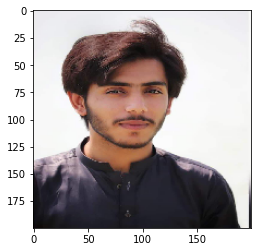

[[0. 1. 0.]]


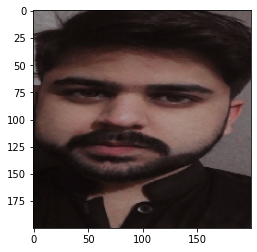

[[1. 0. 0.]]


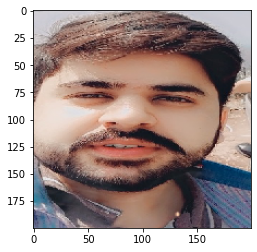

[[0. 1. 0.]]


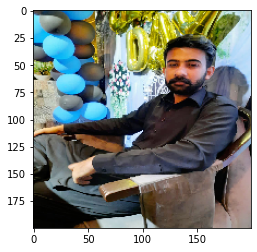

[[0. 0. 1.]]


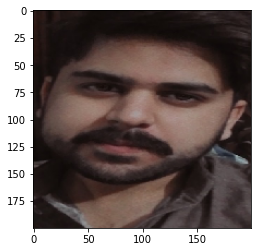

[[1. 0. 0.]]


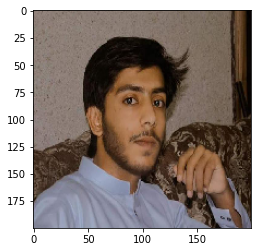

[[0. 1. 0.]]


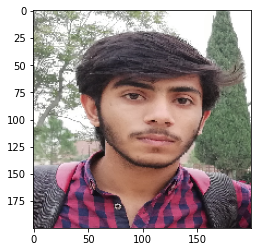

[[0. 1. 0.]]


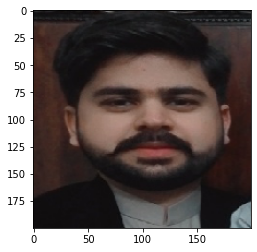

[[0. 0. 1.]]


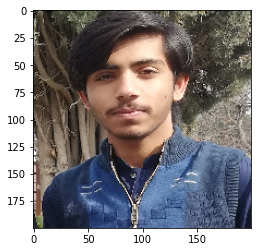

[[0. 1. 0.]]


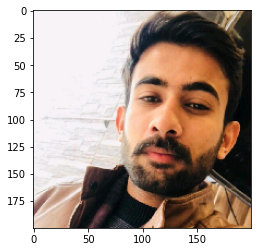

[[0. 0. 1.]]


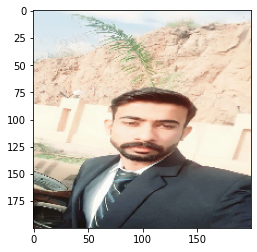

[[0. 0. 1.]]


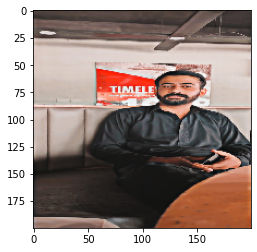

[[0. 0. 1.]]


In [58]:
dir_path='basedata/testing/'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    #put all images into array
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    
    val = model.predict(images)
    
    print(val)
    